In [8]:
from google.colab import drive

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# accessing drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#path to data.yaml
data_path = '/content/drive/MyDrive/YOLOv8/data.yaml'

In [3]:
# predeclaring all the paths;
data_path = '/content/drive/MyDrive/YOLOv8/data.yaml'
train_path = '/content/drive/MyDrive/YOLOv8/train/images'
valid_path = '/content/drive/MyDrive/YOLOv8/valid/images'
test_path = '/content/drive/MyDrive/YOLOv8/test/images'

In [4]:
# initializing output directories
project_dir = '/content/drive/MyDrive/YOLOv8/training_results'
output_dir = '/content/drive/MyDrive/YOLOv8/output'
confusion_matrix_image_path = f'{project_dir}/confusion_matrix.png'

In [ ]:
# installing yolov8
!pip install ultralytics


In [ ]:
# using cline command
!yolo task=detect mode=train model=yolov8s.pt data={data_path} epochs=20 imgsz=640 batch=8 project={project_dir} name=car_parts


Ultralytics YOLOv8.2.55 🚀 Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/YOLOv8/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YOLOv8/training_results, name=car_parts4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False

In [ ]:
# Predicting using the trained model
!yolo task=detect mode=predict model={project_dir}/car_parts4/weights/best.pt conf=0.55 source={test_path}


Ultralytics YOLOv8.2.55 🚀 Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

image 1/22 /content/drive/MyDrive/YOLOv8/test/images/Cars212_png.rf.c31b66dbfb5e4d5bc2e10f4b331f03aa.jpg: 640x640 1 license_plate, 16.4ms
image 2/22 /content/drive/MyDrive/YOLOv8/test/images/Cars260_png.rf.358fc27422dbe6062fced88e7e5b59cc.jpg: 640x640 2 cars, 2 license_plates, 16.4ms
image 3/22 /content/drive/MyDrive/YOLOv8/test/images/Cars295_png.rf.5452c67121f3be7c3e37148a9cc4936d.jpg: 640x640 2 cars, 2 license_plates, 16.4ms
image 4/22 /content/drive/MyDrive/YOLOv8/test/images/Cars304_png.rf.f31408152fe09e73a74c2949a65058a0.jpg: 640x640 1 headlamp, 1 license_plate, 1 wheel, 16.4ms
image 5/22 /content/drive/MyDrive/YOLOv8/test/images/Cars306_png.rf.dd001ad2f0e6c305bf5bd3d704eebd75.jpg: 640x640 1 car, 1 front_windshield, 1 headlamp, 1 license_plate, 2 sideview_mirrors, 16.4ms
image 6/22 /content/drive/MyDrive/YOLOv8/t

In [ ]:
# Copying to drive
!cp -r /content/runs/detect/predict {output_dir}

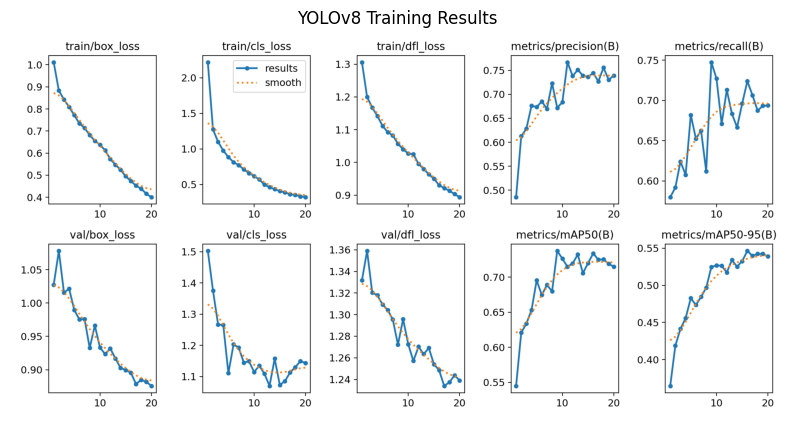

In [9]:
# paths
results_image_path = '/content/drive/MyDrive/YOLOv8/training_results/car_parts4/results.png'

# plotting
results_img = mpimg.imread(results_image_path)
plt.figure(figsize=(10, 10))
plt.imshow(results_img)
plt.title('YOLOv8 Training Results')
plt.axis('off') 
plt.show()




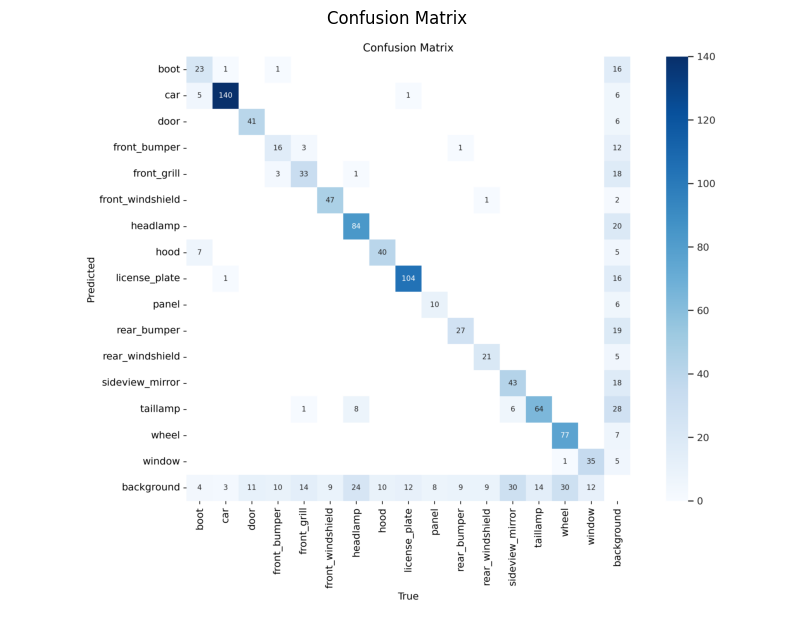

In [10]:
confusion_matrix_image_path = '/content/drive/MyDrive/YOLOv8/training_results/car_parts4/confusion_matrix.png'

# plotting img
confusion_matrix_img = mpimg.imread(confusion_matrix_image_path)
plt.figure(figsize=(10, 10))
plt.imshow(confusion_matrix_img)
plt.title('Confusion Matrix')
plt.axis('off') 
plt.show()
